In [ ]:
import numpy as np
import pandas as pd

In [ ]:
df = pd.read_csv("datasets/temperatures.csv")

In [ ]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   YEAR     117 non-null    int64  
 1   JAN      117 non-null    float64
 2   FEB      117 non-null    float64
 3   MAR      117 non-null    float64
 4   APR      117 non-null    float64
 5   MAY      117 non-null    float64
 6   JUN      117 non-null    float64
 7   JUL      117 non-null    float64
 8   AUG      117 non-null    float64
 9   SEP      117 non-null    float64
 10  OCT      117 non-null    float64
 11  NOV      117 non-null    float64
 12  DEC      117 non-null    float64
 13  ANNUAL   117 non-null    float64
 14  JAN-FEB  117 non-null    float64
 15  MAR-MAY  117 non-null    float64
 16  JUN-SEP  117 non-null    float64
 17  OCT-DEC  117 non-null    float64
dtypes: float64(17), int64(1)
memory usage: 16.6 KB


In [ ]:
df.isnull().sum()

YEAR       0
JAN        0
FEB        0
MAR        0
APR        0
MAY        0
JUN        0
JUL        0
AUG        0
SEP        0
OCT        0
NOV        0
DEC        0
ANNUAL     0
JAN-FEB    0
MAR-MAY    0
JUN-SEP    0
OCT-DEC    0
dtype: int64

In [ ]:
df.shape

(117, 18)

<AxesSubplot:>

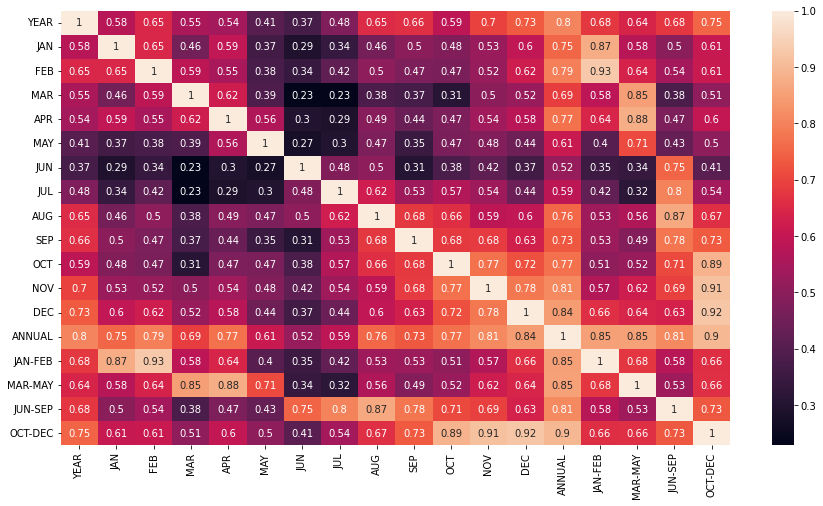

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
sb.heatmap(df.corr(),annot=True)

In [ ]:
df.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


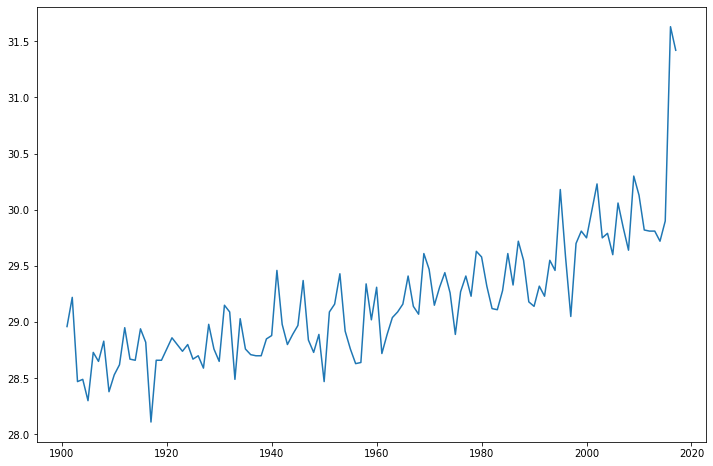

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df['YEAR'],df['ANNUAL'])

In [ ]:
def trim_data(data,threshold):
    corr = data.corr()
    del_col = []
    for i in range(len(corr.columns)):
        for j in range(i):
            if(corr.iloc[i,j]>=threshold and corr.columns[i] not in del_col):
                del_col.append(corr.columns[i])
    return del_col

In [ ]:
data = trim_data(df,0.85)

In [ ]:
data

['JAN-FEB', 'MAR-MAY', 'JUN-SEP', 'OCT-DEC']

In [ ]:
df.drop(data,axis=1,inplace=True)

In [ ]:
x_col = list(df.columns)
x_col.remove('ANNUAL')
X = df[x_col]

In [ ]:
X.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82


In [ ]:
y = df['ANNUAL']
y.head()

0    28.96
1    29.22
2    28.47
3    28.49
4    28.30
Name: ANNUAL, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1)

In [ ]:
X_train

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
33,1934,22.76,26.29,28.61,31.95,33.29,32.67,31.04,30.10,30.77,29.75,26.77,24.31
59,1960,23.78,27.19,28.04,31.90,33.57,33.17,30.86,30.70,30.45,29.90,26.92,25.24
92,1993,23.82,26.79,28.37,32.33,34.14,33.18,30.98,31.21,30.52,30.16,27.66,25.41
42,1943,22.97,25.12,29.06,30.75,32.68,32.17,30.84,30.15,30.20,29.43,27.69,24.88
10,1911,23.22,24.58,27.04,31.27,33.78,32.23,31.44,30.80,30.10,29.43,25.70,23.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9,1910,23.24,25.16,28.48,31.42,33.51,31.84,30.42,29.86,29.82,28.91,26.32,23.37
72,1973,24.02,26.67,29.26,33.30,34.01,33.05,31.34,30.15,30.57,29.41,27.38,24.12
12,1913,23.71,24.79,27.62,32.02,33.07,32.23,30.65,30.48,30.33,29.42,26.28,23.56
107,2008,23.97,25.48,30.34,32.13,33.86,32.15,31.24,30.69,30.92,30.81,28.15,25.91


In [ ]:
y_train

33     29.03
59     29.31
92     29.55
42     28.80
10     28.62
       ...  
9      28.53
72     29.44
12     28.67
107    29.64
37     28.70
Name: ANNUAL, Length: 87, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score,r2_score,mean_squared_error, mean_absolute_error

reg = LinearRegression()
reg.fit(X_train,y_train)
predictions = reg.predict(X_test)

r2 = r2_score(y_test,predictions)
mse = mean_squared_error(y_test,predictions)
mae = mean_absolute_error(y_test,predictions)

print(r2," ",mse," ",mae," ")


0.9821431252046161   0.003651455106145262   0.03817233183380218  


In [ ]:
print(reg.coef_, "\n", reg.intercept_)

[0.0004785  0.08623998 0.08868792 0.07779526 0.09728201 0.06141626
 0.08790058 0.06326948 0.08281964 0.10142974 0.08980785 0.04332991
 0.09515596] 
 -0.16020670940194393


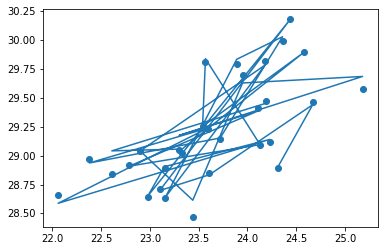

In [ ]:
plt.scatter(X_test['JAN'],y_test)
plt.plot(X_test['JAN'],predictions)